In [1]:
import pandas as pd
import numpy as np
import scipy as stats

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import datetime 

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("learningSet.csv")
data.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Columns: 481 entries, ODATEDW to GEOCODE2
dtypes: float64(97), int64(310), object(74)
memory usage: 350.1+ MB


In [4]:
data.shape

(95412, 481)

#### 1. Check for null values in the numerical columns.

In [5]:
numerical=data.select_dtypes(np.number)
numerical.head()

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,...,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,NaN,0,NaN,NaN,...,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.0,1.0,6.0,9.0,16,0.0,0.0,...,9310,9504.0,18.0,15.666667,148535,0,0.0,0,2,1.0
2,9001,1,0,NaN,NaN,3.0,1.0,2,0.0,0.0,...,9001,9101.0,12.0,7.481481,15078,0,0.0,1,4,60.0
3,8701,0,2801,70.0,NaN,1.0,4.0,2,0.0,0.0,...,8702,8711.0,9.0,6.812500,172556,0,0.0,1,4,41.0
4,8601,0,2001,78.0,1.0,3.0,2.0,60,1.0,0.0,...,7903,8005.0,14.0,6.864865,7112,0,0.0,1,2,26.0


In [6]:
numerical.shape

(95412, 407)

In [7]:
n=numerical.isna().sum()
n =n.sort_values(ascending=False).head(50)
n

RDATE_5     95403
RAMNT_5     95403
RDATE_3     95170
RAMNT_3     95170
RDATE_4     95131
RAMNT_4     95131
RAMNT_6     94636
RDATE_6     94636
RDATE_15    88150
RAMNT_15    88150
RDATE_23    87553
RAMNT_23    87553
RAMNT_20    87524
RDATE_20    87524
RAMNT_7     86517
RDATE_7     86517
RDATE_17    86011
RAMNT_17    86011
RAMNT_21    85899
RDATE_21    85899
RDATE_10    84951
RAMNT_10    84951
RDATE_13    83162
RAMNT_13    83162
NUMCHLD     83026
RAMNT_11    80672
RDATE_11    80672
RDATE_19    79535
RAMNT_19    79535
RDATE_9     78678
RAMNT_9     78678
RAMNT_24    77674
RDATE_24    77674
RAMNT_18    75634
RDATE_18    75634
RDATE_22    74539
RAMNT_22    74539
RAMNT_8     73940
RDATE_8     73940
RAMNT_14    72095
RDATE_14    72095
RAMNT_12    69712
RDATE_12    69712
RDATE_16    68418
RAMNT_16    68418
ADATE_15    65477
ADATE_23    56270
MBCOLECT    52914
PUBHLTH     52854
PUBDOITY    52854
dtype: int64

In [8]:
numerical_nulls = numerical.columns[numerical.isna().sum()>0]
len(numerical_nulls) #columns with null values.

91

In [9]:
numerical.isna().sum().to_frame().rename(columns={0:'count'}).sort_values(by='count', ascending=False)

,count
RDATE_5,95403
RAMNT_5,95403
RDATE_3,95170
RAMNT_3,95170
RDATE_4,95131
...,...
HUPA7,0
HUPA6,0
HUPA5,0
HUPA4,0


In [10]:
nulls_numerical = pd.DataFrame(numerical.isna().sum()*100/len(numerical), columns=['percentage'])
nulls_numerical.sort_values('percentage', ascending = False).head(10)

#Many collumns with 99% of missing values, perhaps we could remove them??

,percentage
RDATE_5,99.990567
RAMNT_5,99.990567
RDATE_3,99.746363
RAMNT_3,99.746363
RDATE_4,99.705488
RAMNT_4,99.705488
RAMNT_6,99.186685
RDATE_6,99.186685
RDATE_15,92.388798
RAMNT_15,92.388798


#### 2. Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.

#### GEOCODE2

In [11]:
data.GEOCODE2.value_counts()

A    34484
B    28505
D    16580
C    15524
       187
Name: GEOCODE2, dtype: int64

In [12]:
data.GEOCODE2.isna().sum()

132

In [13]:
# Only 187 rows with empty values, let's remove them.

data = data[~data['GEOCODE2'].isin([' '])] #(take "GEOCODE2" column without ' ' values)
#data['GEOCODE2'].replace([" "], np.NaN)
#data['GEOCODE2'] = data['GEOCODE2'].apply(lambda x: x.replace(" ", np.NaN))

In [14]:
data.dropna(subset = ['GEOCODE2'], inplace=True)
# 132 rows are nulls, so I am going to drop the rows with null values. 
data.shape

(95093, 481)

In [ ]:
data.GEOCODE2.isna().sum()

In [ ]:
#In total we lost 318 rows which is 0.3% of our total rows.

#### WEALTH1

Wealth Rating: uses median family income and population statistics from each area to index relative wealth within each state The segments are denoted 0-9, with 9 being the highest income group and zero being the lowest. Each rating has a different meaning within each state.


<AxesSubplot:xlabel='WEALTH1', ylabel='Density'>

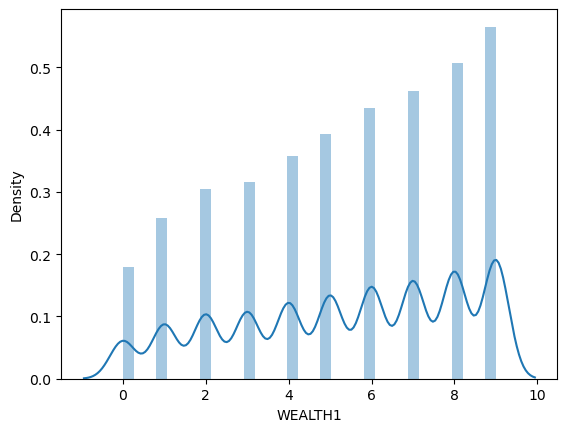

In [15]:
sns.distplot(numerical.WEALTH1)

In [16]:
numerical.WEALTH1.value_counts()

9.0    7585
8.0    6793
7.0    6198
6.0    5825
5.0    5280
4.0    4810
3.0    4237
2.0    4085
1.0    3454
0.0    2413
Name: WEALTH1, dtype: int64

In [17]:
numerical.WEALTH1.isna().sum()

#44732 rows with NULL values, a lot to remove.

44732

#### Using Linear Regression to replace the missing data in "WEALTH1" with the values predicted.

In [23]:
# Let's remove the columns with NULLS we are going to use to PREDICT our null values in "WEALTH1" column
# Linear and Logistic Regression Models can't handle any nulls.

nulls_percent = pd.DataFrame(numerical.isna().sum()*100/len(numerical)).reset_index() 
nulls_percent.columns = ['column_name', 'nulls_percentage']
nulls_percent.sort_values('nulls_percentage', ascending = False).head(10)

,column_name,nulls_percentage
346,RDATE_5,99.990567
368,RAMNT_5,99.990567
344,RDATE_3,99.746363
366,RAMNT_3,99.746363
345,RDATE_4,99.705488
367,RAMNT_4,99.705488
369,RAMNT_6,99.186685
347,RDATE_6,99.186685
356,RDATE_15,92.388798
378,RAMNT_15,92.388798


In [24]:
columns_above_threshold = nulls_percent[nulls_percent['nulls_percentage']>0.0]  #all columns with null values
columns_above_threshold.sort_values('nulls_percentage')
drop_columns_list = list(columns_above_threshold['column_name'])
drop_columns_list.remove("WEALTH1")

In [25]:
len(drop_columns_list) #90 COLUMNS with nulls

90

In [21]:
#Drop them

numerical_linreg = numerical.drop(columns=drop_columns_list)
numerical_linreg.shape

(95412, 317)

In [27]:
X_train=numerical_linreg[~numerical_linreg.WEALTH1.isnull()]   #Selecting Data without NUlls. 
# Selecting all rows of numerical df where WEALTH1 is not null.

In [28]:
X_train=X_train.drop(['WEALTH1'], axis=1)  # Remove target from X_train


In [29]:
y_train=numerical_linreg[~numerical_linreg.WEALTH1.isnull()][['WEALTH1']] #Selecting rows from our target,WEALTH1 column, that are not null,to train the model.
y_train.shape

(50680, 1)

In [30]:
#Selecting all rows of numerical df where "WEALTH1" is null, to make our predictions.
# We don't have y_test because everything is null.

X_test = numerical_linreg[numerical_linreg.WEALTH1.isnull()]    

In [31]:
X_test=X_test.drop(['WEALTH1'], axis=1)   #Dropping target.

In [32]:
X_test.shape

(44732, 316)

In [33]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [34]:
model=LinearRegression().fit(X_train, y_train)

In [35]:
wealth1_pred_linreg = model.predict(X_test) 
wealth1_pred_linreg

array([[4.23758423],
       [7.15892252],
       [5.00569003],
       ...,
       [6.284458  ],
       [2.66948672],
       [7.2322402 ]])

In [36]:
wealth1_pred_linreg= np.round(wealth1_pred_linreg)
print("length of predictions:", len(wealth1_pred_linreg))

length of predictions: 44732


In [ ]:
#list(numerical.columns)

In [ ]:
#col=list(numerical.columns).index('WEALTH1')
#col  #index3

In [37]:
#assigning the predictions to the rows where data is null

numerical_linreg.loc[numerical_linreg.WEALTH1.isnull(),'WEALTH1']=wealth1_pred_linreg

In [38]:
numerical_linreg.WEALTH1.isna().sum()

0

In [39]:
numerical_linreg.WEALTH1.value_counts()

 5.0     11952
 6.0     11742
 4.0     11481
 7.0     11236
 8.0     10778
 3.0     10707
 9.0      9584
 2.0      8485
 1.0      5557
 0.0      3218
 10.0      326
-1.0       205
-2.0        51
 11.0       51
 12.0       19
-3.0         7
-4.0         5
 14.0        4
 13.0        3
 15.0        1
Name: WEALTH1, dtype: int64

<AxesSubplot:xlabel='WEALTH1', ylabel='Density'>

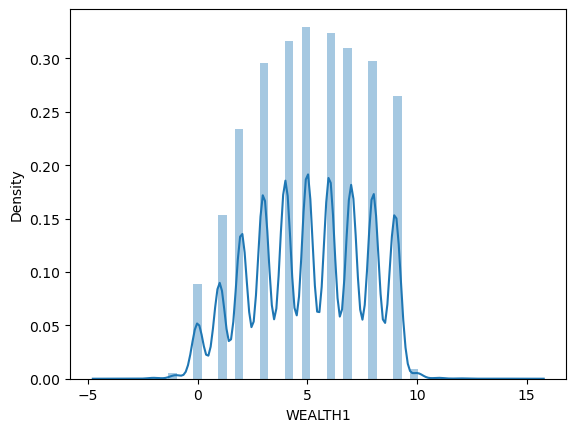

In [40]:
sns.distplot(numerical_linreg.WEALTH1)

#### Using Logistic Regression to replace the missing data in "WEALTH1" with the values predicted.

In [41]:
# let's try Logistic Regression, since WEALTH1 Column is a rating between 0-9 therefore is discrete numerical which is ordinal.

from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

In [42]:
#Drop columns with null values since logistic regression cant handle null values

logreg = numerical.drop(columns=drop_columns_list)
logreg.shape

(95412, 317)

In [43]:
X_train=logreg[~logreg.WEALTH1.isnull()]   #Selecting Data without NUlls. 
# Selecting all rows of numerical df where WEALTH1 is not null.

In [44]:
X_train=X_train.drop(['WEALTH1'], axis=1)  # Remove target from X_train


In [ ]:
y_train=logreg[~logreg.WEALTH1.isnull()][['WEALTH1']] #Selecting rows from our target,WEALTH1 column, that are not null,to train the model.
y_train.shape

In [ ]:
X_test = logreg[logreg.WEALTH1.isnull()]    
#Selecting all rows of numerical df where "WEALTH1" is null, to make our predictions.
# We don't have y_test because everything is null.

In [ ]:
X_test=X_test.drop(['WEALTH1'], axis=1)   #Dropping target.
X_test.shape

In [45]:
classification = LogisticRegression(random_state=0, multi_class='multinomial').fit(X_train, y_train)

In [46]:
# We predict on the testing dataset
predictions = classification.predict(X_test)

In [47]:
pd.Series(predictions).value_counts() 

2.0    9107
9.0    6156
8.0    6003
4.0    5766
7.0    4475
1.0    4228
6.0    3914
0.0    2572
5.0    1878
3.0     633
dtype: int64

In [ ]:
#assigning the predictions to the rows where data is null

logreg.loc[logreg.WEALTH1.isna(),'WEALTH1']=predictions

In [51]:
logreg.WEALTH1.isna().sum()

0

In [52]:
logreg.WEALTH1.value_counts()

9.0    13741
2.0    13192
8.0    12796
7.0    10673
4.0    10576
6.0     9739
1.0     7682
5.0     7158
0.0     4985
3.0     4870
Name: WEALTH1, dtype: int64

<AxesSubplot:xlabel='WEALTH1', ylabel='Density'>

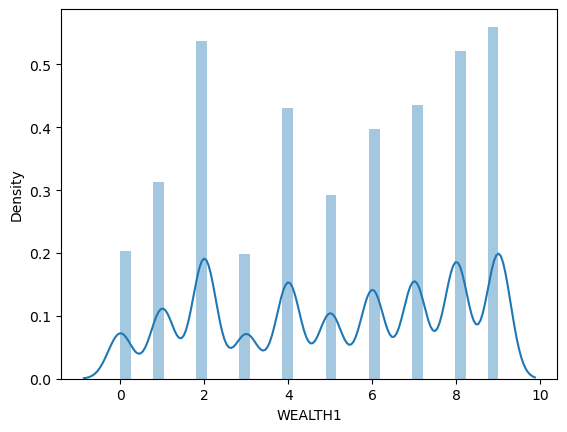

In [53]:
sns.distplot(logreg.WEALTH1)

In [54]:
#replace the values of WEALTH1 column from logreg dataframe in the original DATA dataframe.

data.WEALTH1 = logreg.WEALTH1

In [55]:
data.WEALTH1.isna().sum()

0

In [56]:
data.WEALTH1.value_counts()

9.0    13729
2.0    13174
8.0    12775
7.0    10659
4.0    10565
6.0     9723
1.0     7677
5.0     7150
3.0     4863
0.0     4778
Name: WEALTH1, dtype: int64

#### ADI
ADI CODE - An Area of Dominant Influence (ADI) is the geographic area or market reached by a certain radio, television station, newspaper. 

Certain media organizations are associated with a Designated Market Area (DMA) or a Metropolitan Statistical Area (MSA) to identify them by local area. 

In [57]:
data.ADI.unique()

array([177.,  13., 281.,  67., 127., 185.,  91., 251., 391., 181., 269.,
        83., 107., 249., 291.,  57., 227., 329., 351.,  55., 133.,  51.,
        73., 159., 201.,  75., 233., 591., 203., 175.,  59., 105., 111.,
       173., 415., 323., 187.,  65., 412., 109., 425., 405., 197., 279.,
       645., 207.,  89., 361., 209., 213.,  15.,  21., 113., 131., 469.,
       199., 129., 441., 459., 235., 301.,  39., 429., 285., 245., 335.,
       393., 577., 439., 455., 383., 263.,   0., 427., 307., 275., 119.,
       229., 273., 325., 371., 377., 315., 342., 421., 219.,  61.,  93.,
       375., 283., 381., 243., 353., 613., 339., 367., 417., 299., 271.,
       157.,  77., 327.,  53.,  87., 451., 627.,  71., 253., 363., 403.,
       115., 389.,  63., 321., 448., 237., 217., 241., 123., 221., 165.,
       277.,  85., 319., 247.,  69., 379.,  95.,  17., 625., 462., 303.,
       179., 331., 231., 337., 257., 409., 457., 359., 373., 413., 215.,
       205., 313., 211., 305., 355., 419., 473., 42

In [58]:
data.ADI.isna().sum()

0

In [59]:
# Only 132 null values, let's drop them

data.dropna(subset = ["ADI"], inplace=True)

In [60]:
data.ADI.isna().sum()

0

#### DMA 
A Designated Market Area (often referred to as DMA) is an advertising term that stands for different regions in the United States divided into separate marketing areas.

In [61]:
data.DMA.nunique()

# There are 210 DMAs covering the whole United States and are usually defined based on metropolitan areas, with suburbs often being combined within. 

205

In [62]:
data.DMA.isna().sum()

#No nulls in DMA column.

0

#### MSA

Metropolitan Statistical Area, as defined by the Office of Management and Budget, is used to designate a United States metropolitan area.



In [63]:
data.MSA.nunique()


298

In [64]:
data.MSA.isna().sum()
#No nulls in MSA column.

0